In [3]:
# In this notebook, we manually perform linear regression on a simple salary / experience dataset.

In [4]:
#define the function to calculate the cost function
def cost_function(X, y, theta):
    m = len(y)
    cost = np.sum((X.dot(theta) - y) ** 2)/(2 * m)
    
    return cost

In [5]:
#define the function to calculate the gradient descent
def gradient_descent_1d(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        temp_theta_0 = theta[0] - (alpha/len(y)) * np.sum(X.dot(theta) - y)
        temp_theta_1 = theta[1] - (alpha/len(y)) * np.sum((X.dot(theta) - y) * X[:,1])
        theta[0] = temp_theta_0
        theta[1] = temp_theta_1
        cost_history[i] = cost_function(X, y, theta)

        
    return theta, cost_history


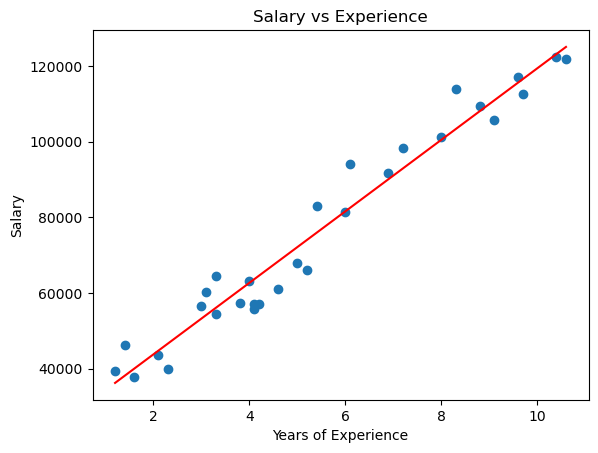

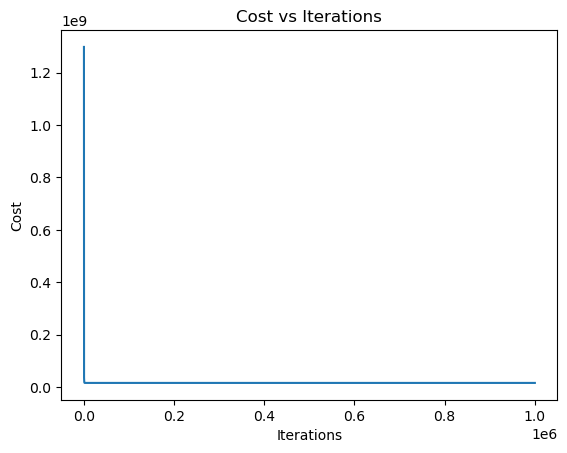

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the dataset
dataset = pd.read_csv('salary_dataset.csv')
dataset = dataset.iloc[:, 1:]


#get first column of dataset
X = dataset.iloc[:, :-1].values
# add a column of ones to the dataset
X = np.c_[np.ones((X.shape[0], 1)), X]
#get second column of dataset
y = dataset.iloc[:, 1].values
#initialize theta
theta = np.zeros(X.shape[1])

theta, cost_history = gradient_descent_1d(X, y, theta, 0.01, 1000000)


#plot the data with the regression line
plt.scatter(X[:,1], y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.plot(X[:,1], X.dot(theta), color='red')
plt.show()

#plot the cost function
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()




[24848.20396652  9449.96232146]


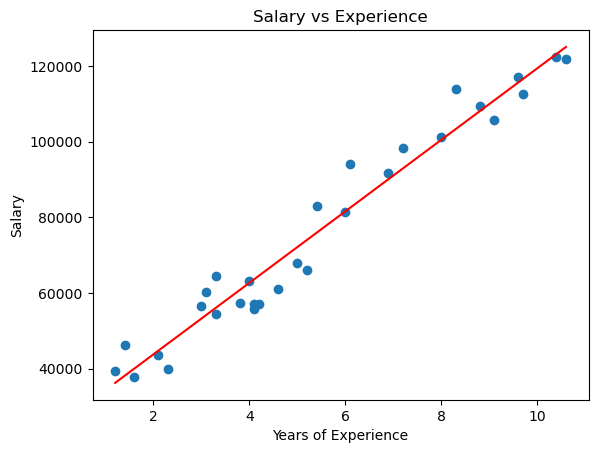

[24848.20396652  9449.96232146]
[24848.20396652  9449.96232146]
15635475.861140486
15635475.861140482


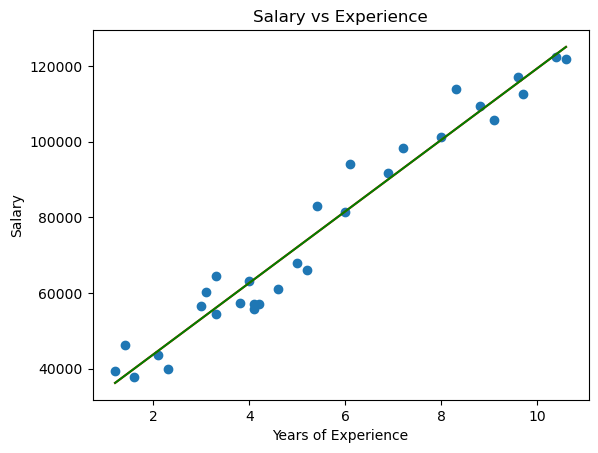

In [15]:
#Now, we use the normal equation to calculate the theta values
exact_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(exact_theta)

#plot the data with the regression line
plt.scatter(X[:,1], y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.plot(X[:,1], X.dot(exact_theta), color='red')
plt.show()

#compare the two theta values
print(theta)
print(exact_theta)
#Compare error
print(cost_function(X, y, theta))
print(cost_function(X, y, exact_theta))

#plot both lines
plt.scatter(X[:,1], y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.plot(X[:,1], X.dot(theta), color='red')
plt.plot(X[:,1], X.dot(exact_theta), color='green')
plt.show()
